Metadata:
- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
- "weathe_code" category description:
   - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
   - 2 = scattered clouds / few clouds 
   - 3 = Broken clouds 
   - 4 = Cloudy 
   - 7 = Rain/ light Rain shower/ Light rain 
   - 10 = rain with thunderstorm 
   - 26 = snowfall 
   - 94 = Freezing Fog

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('london_merged.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,1/4/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,1/4/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,1/4/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17413 non-null  float64
 2   t1            17414 non-null  float64
 3   t2            17413 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

timestamp       0
cnt             1
t1              0
t2              1
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17413.000000,17414.000000,17413.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.017401,12.468091,11.520980,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.082280,5.571818,6.615307,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.000000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


<AxesSubplot: >

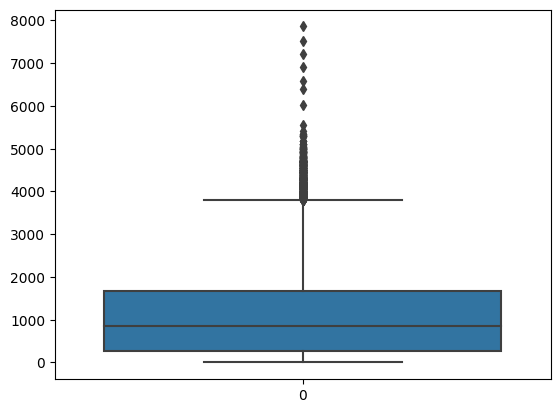

In [7]:
sns.boxplot(df['cnt'])

In [8]:
df1 = df.copy()
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [9]:
df1['timestamp'].dt.month

0        1
1        1
2        1
3        1
4        1
        ..
17409    1
17410    1
17411    1
17412    1
17413    1
Name: timestamp, Length: 17414, dtype: int64

# handling missing value

In [10]:
df1.dropna()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4,0,0,3


In [11]:
df1['cnt'].fillna(844,inplace=True)
df1['t2'] = df1['t2'].fillna(11.520980)

In [12]:
df1.drop(['t2'],axis='columns')

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138.0,3.0,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,76.0,23.0,4,0,0,3


In [13]:
df1.drop(['t2'],axis=1)

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138.0,3.0,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,76.0,23.0,4,0,0,3


In [14]:
df1.drop(0)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3
5,2015-01-04 05:00:00,46.0,2.0,2.0,93.0,4.0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4,0,0,3


# Handling Outliers


<AxesSubplot: >

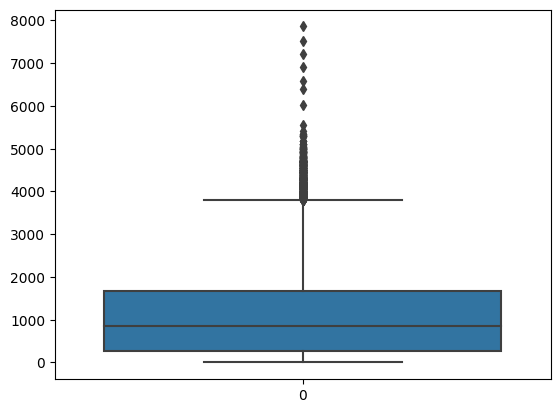

In [15]:
sns.boxplot(df['cnt'])

<AxesSubplot: >

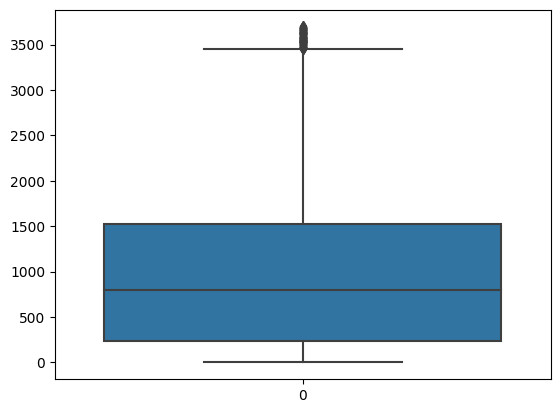

In [16]:
no_outliers = df1[df1['cnt']<=3700]['cnt']
sns.boxplot(no_outliers)

In [17]:
q1 = df['cnt'].quantile(0.25)
q3 = df['cnt'].quantile(0.75)
iqr = q3-q1

upper = q3+1.5*iqr
lower = q1-1.5*iqr

<AxesSubplot: >

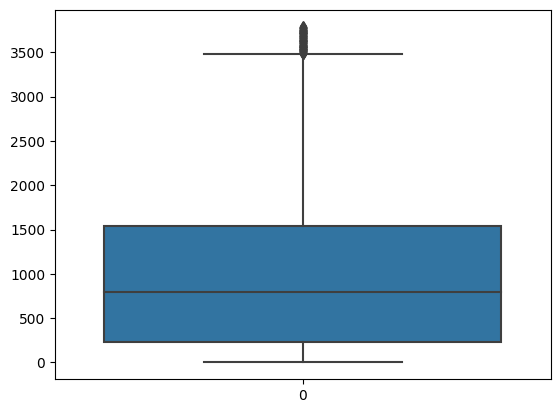

In [18]:
no_outliers = df[(df['cnt']>=lower) & (df['cnt']<=upper)]['cnt']
sns.boxplot(no_outliers)

# Select column

In [19]:
df1[['cnt']]

,cnt
0,182.0
1,138.0
2,134.0
3,72.0
4,47.0
...,...
17409,1042.0
17410,541.0
17411,337.0
17412,224.0


In [20]:
df1.select_dtypes('number')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,47.0,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...
17409,1042.0,5.0,1.0,81.0,19.0,3,0,0,3
17410,541.0,5.0,1.0,81.0,21.0,4,0,0,3
17411,337.0,5.5,1.5,78.5,24.0,4,0,0,3
17412,224.0,5.5,1.5,76.0,23.0,4,0,0,3


In [21]:
df1.select_dtypes('object')

""
0
1
2
3
4
...
17409
17410
17411
17412


# Select Row

In [22]:
df1.loc[0,['timestamp','cnt']]

timestamp    2015-01-04 00:00:00
cnt                        182.0
Name: 0, dtype: object

In [23]:
df1.iloc[0,[0,1]]

timestamp    2015-01-04 00:00:00
cnt                        182.0
Name: 0, dtype: object

In [24]:
df1.iloc[0:10,-1]

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: season, dtype: int64

# filter

In [25]:
df1[df['season'] == 1]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
3544,2015-06-01 00:00:00,226.0,10.0,7.5,67.0,19.5,1,0,0,1
3545,2015-06-01 01:00:00,114.0,10.0,8.0,67.0,18.0,1,0,0,1
3546,2015-06-01 02:00:00,65.0,9.0,6.5,73.5,16.0,1,0,0,1
3547,2015-06-01 03:00:00,34.0,9.0,6.5,73.5,16.0,1,0,0,1
3548,2015-06-01 04:00:00,51.0,9.0,6.5,71.0,17.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14448,2016-08-31 19:00:00,2750.0,22.0,22.0,65.0,21.5,2,0,0,1
14449,2016-08-31 20:00:00,1515.0,21.0,21.0,69.0,23.0,2,0,0,1
14450,2016-08-31 21:00:00,1134.0,20.0,20.0,71.0,19.0,2,0,0,1
14451,2016-08-31 22:00:00,853.0,19.0,19.0,64.0,19.5,1,0,0,1


In [26]:
df1[(df['season'] == 1) & (df['is_holiday'] == 1)]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
5721,2015-08-31 00:00:00,425.0,16.5,16.5,82.5,9.5,7,1,0,1
5722,2015-08-31 01:00:00,235.0,16.0,16.0,88.0,10.0,7,1,0,1
5723,2015-08-31 02:00:00,233.0,16.0,16.0,88.0,11.0,7,1,0,1
5724,2015-08-31 03:00:00,158.0,16.0,16.0,88.0,6.5,3,1,0,1
5725,2015-08-31 04:00:00,140.0,16.0,16.0,88.0,6.0,7,1,0,1
5726,2015-08-31 05:00:00,116.0,15.5,15.5,91.0,8.0,7,1,0,1
5727,2015-08-31 06:00:00,93.0,15.0,15.0,94.0,8.0,7,1,0,1
5728,2015-08-31 07:00:00,73.0,15.0,15.0,94.0,7.5,7,1,0,1
5729,2015-08-31 08:00:00,203.0,15.0,15.0,94.0,11.0,7,1,0,1
5730,2015-08-31 09:00:00,310.0,16.0,16.0,88.0,11.0,3,1,0,1


In [27]:
df1[(df1['season'] == 1) | (df1['season'] == 2) | (df1['season'] == 3)]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4,0,0,3


In [28]:
search = [0,3]
df1[df1['season'].isin(search)]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042.0,5.0,1.0,81.0,19.0,3,0,0,3
17410,2017-01-03 20:00:00,541.0,5.0,1.0,81.0,21.0,4,0,0,3
17411,2017-01-03 21:00:00,337.0,5.5,1.5,78.5,24.0,4,0,0,3
17412,2017-01-03 22:00:00,224.0,5.5,1.5,76.0,23.0,4,0,0,3


# Add column

In [29]:
df1['kolom_baru'] = 1

In [30]:
df1.insert(1,'kolom_baruv2',1)

In [31]:
df1['cnt/10'] = df['cnt']/10

# Decoding

In [32]:
# transformasi dari angka ke string

In [33]:
df2 = df.copy()

def is_holiday_adj(x):
    if x == 0:
        return 'bukan liburan'
    elif x== 1:
        return 'liburan'
        

df2['is_holiday'] = df2['is_holiday'].apply(is_holiday_adj)
df2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,bukan liburan,1,3
1,1/4/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,bukan liburan,1,3
2,1/4/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,bukan liburan,1,3
3,1/4/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,bukan liburan,1,3
4,1/4/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,bukan liburan,1,3


In [34]:
df2['is_weekend'] = df2['is_weekend'].apply(lambda x: 'bukan weekend' if x == 0 else 'weekend')
df2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,bukan liburan,weekend,3
1,1/4/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,bukan liburan,weekend,3
2,1/4/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,bukan liburan,weekend,3
3,1/4/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,bukan liburan,weekend,3
4,1/4/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,bukan liburan,weekend,3


# Encoding

In [35]:
#transformasi string/kategorik -> angka/numeric

In [36]:
df2['is_weekend'] = df2['is_weekend'].apply(lambda x: 0 if x == 'bukan weekend' else 1)
df2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,bukan liburan,1,3
1,1/4/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,bukan liburan,1,3
2,1/4/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,bukan liburan,1,3
3,1/4/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,bukan liburan,1,3
4,1/4/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,bukan liburan,1,3


In [37]:
def is_holiday_adj(x):
    if x == 'bukan liburan':
        return 0
    elif x== 'liburan':
        return 1

df2['is_holiday'] = df2['is_holiday'].apply(is_holiday_adj)
df2.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,1/4/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3
1,1/4/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3
2,1/4/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3
3,1/4/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3
4,1/4/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3


# Aggregate

In [38]:
df2.groupby('season')['wind_speed'].mean()

season
0    16.395482
1    15.783793
2    14.330428
3    17.127252
Name: wind_speed, dtype: float64

In [39]:
df2.groupby('season')['wind_speed'].median()

season
0    16.0
1    16.0
2    13.0
3    16.0
Name: wind_speed, dtype: float64

In [40]:
df2.groupby('season')['wind_speed'].agg( Tes = 'mean')

,Tes
season,
0,16.395482
1,15.783793
2,14.330428
3,17.127252


# Visualization

In [41]:
df1['month'] = df1['timestamp'].dt.month
df1['year'] = df1['timestamp'].dt.year

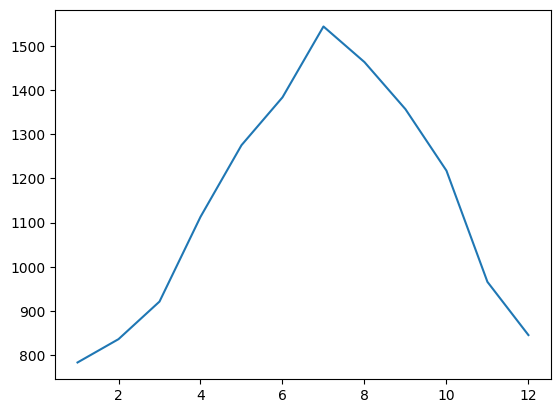

In [42]:
x = df1.groupby('month')['cnt'].mean()
plt.plot(x)

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.240e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <BarContainer object of 10 artists>)

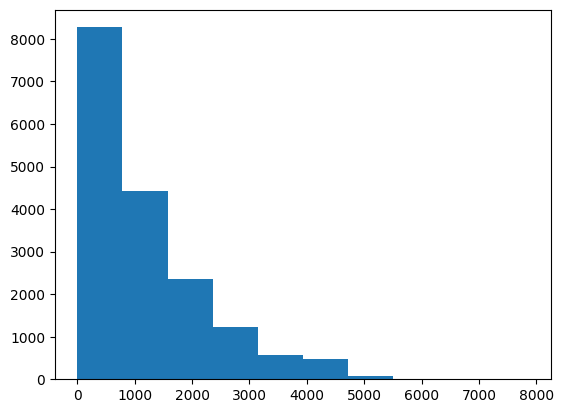

In [43]:
plt.hist(df['cnt'])

<AxesSubplot: >

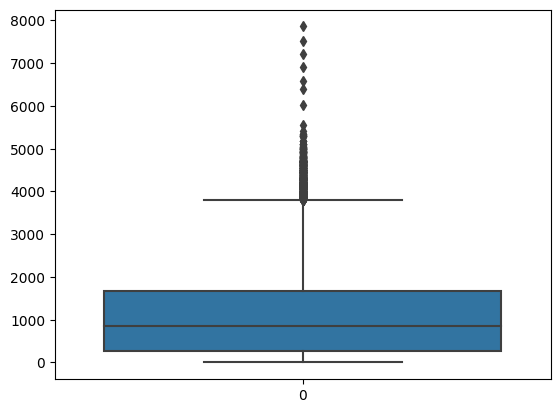

In [44]:
sns.boxplot(df['cnt'])

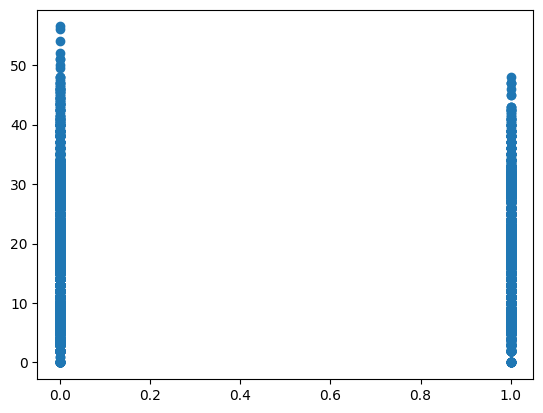

In [45]:
plt.scatter(df['is_weekend'],df['wind_speed'])

In [46]:
sns.scatterplot(df['is_weekend'],df['wind_speed'],hue=df['is_weekend'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
df.groupby('is_weekend')['wind_speed'].agg(mean='mean')

,mean
is_weekend,
0,15.855794
1,16.056455


<BarContainer object of 2 artists>

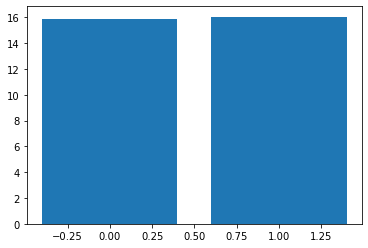

In [ ]:
temp = df.groupby('is_weekend')['wind_speed'].agg(mean='mean')
plt.bar([0,1],[15.855794,16.056455])

([<matplotlib.patches.Wedge at 0x22de93f6c70>,
 [Text(-0.6866807421764359, 0.8593425151381837, ''),
  Text(0.6866807421764358, -0.8593425151381837, '')])

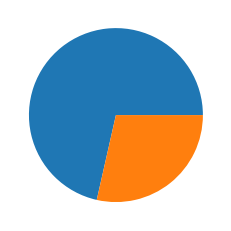

In [ ]:
temp = df['is_weekend'].value_counts()
plt.pie(temp)

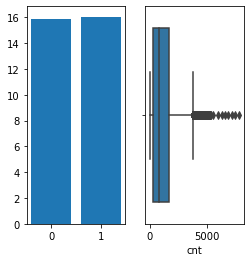

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].bar([0,1],[15.855794,16.056455])
sns.boxplot(df['cnt'], ax = ax[1])

fig.delaxes(ax[2])

<AxesSubplot:xlabel='cnt'>

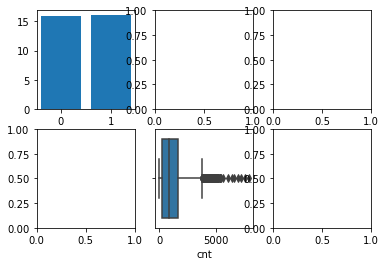

In [ ]:
fig, ax = plt.subplots(2,3)
ax[0][0].bar([0,1],[15.855794,16.056455])
sns.boxplot(df['cnt'], ax = ax[1][1])